<a href="https://colab.research.google.com/github/lmcanavals/acomplex/blob/main/Copy_of_1001_prim_kruskal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/lmcanavals/acomplex.git

fatal: destination path 'acomplex' already exists and is not an empty directory.


In [ ]:
%%bash
cd acomplex
git pull

Already up to date.


In [ ]:
from acomplex.graphstuff import adjlShow
from acomplex.disjointset import DisjointSet

In [ ]:
import heapq as h
import math

def prim(G):
    n = len(G)
    visited = [False]*n
    path = [-1]*n
    cost = [math.inf]*n

    cost[0] = 0
    q = [(0, 0)]
    while q:
        _, u = h.heappop(q)
        if visited[u]: continue
        visited[u] = True
        for v, w in G[u]:
            if not visited[v] and w < cost[v]:
                cost[v] = w
                path[v] = u
                h.heappush(q, (w, v))

    return path 

In [ ]:
%%file 1001a.al
2 9 3 9 4 8
2 6 3 1 6 8
0 9 1 6 4 4 5 2 6 5
0 9 1 1 7 4
0 8 2 4 6 1
2 2
1 8 2 5 4 1
3 4

Overwriting 1001a.al


In [ ]:
with open("1001a.al") as f:
  G = []
  for line in f:
    if line == '-\n':
      G.append([])
    else:
      nums = [int(x) for x in line.split()]
      G.append([(nums[i], nums[i+1]) for i in range(0, len(nums), 2)])

  for x in G:
    print(x)

[(2, 9), (3, 9), (4, 8)]
[(2, 6), (3, 1), (6, 8)]
[(0, 9), (1, 6), (4, 4), (5, 2), (6, 5)]
[(0, 9), (1, 1), (7, 4)]
[(0, 8), (2, 4), (6, 1)]
[(2, 2)]
[(1, 8), (2, 5), (4, 1)]
[(3, 4)]


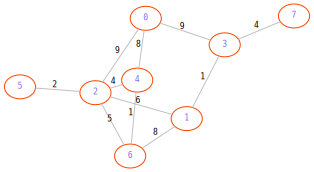

In [ ]:
adjlShow(G, weighted=True, layout="neato")

[-1, 2, 4, 1, 0, 2, 4, 3]


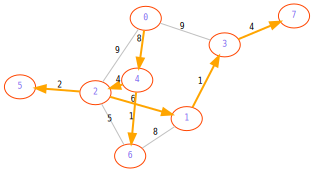

In [ ]:
path = prim(G)
print(path)
adjlShow(G, weighted=True, path=path, layout="neato")

In [ ]:
def kruskal(G, k):
    n = len(G)
    ds = DisjointSet(n)
    edges = [(w, u, v) for u in range(n) for v, w in G[u]]
    edges.sort()
    T = []
    links = 0
    for _, u, v in edges:
        if not ds.sameset(u, v):
            T.append((u, v))
            ds.union(u, v)
            links += 1
        if links == n - k: break

    return T

[(1, 3), (4, 6), (2, 5), (2, 4), (3, 7)]


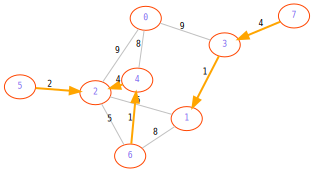

In [ ]:
path = kruskal(G, 3)
print(path)
adjlShow(G, weighted=True, path=path, simplepath=False, layout="neato")